# Congruent number classification and prediction using BSD parameters


The notebook contains ML experiments to classify and predict congruent numnbers. We parameters that appear in the BSD formula as features. The following ML models are used

- logistic regression,
- random forest,
- gradient boost,
- XGboost,
- descision tree classifier.


In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# load your data here. The following ensure this will work on Windows as well as Unix
# the data file has its Kodaira symbols already preprocessed 

df = pd.read_csv("bsd_sqf1mil.csv")
df

,n,cond,rank,reg,sha,2selmer_rank,iscongruent,mod8,tamagawa,torsion,omega,special
0,1,32,0,1.000000,1,2,0,1,2,4,5.244115,0.655514
1,2,64,0,1.000000,1,2,0,2,4,4,3.708149,0.927037
2,3,288,0,1.000000,1,2,0,3,8,4,3.027691,1.513846
3,5,800,1,1.899482,1,3,1,5,8,4,2.345240,2.227370
4,6,576,1,0.888626,1,3,1,6,16,4,2.140901,1.902460
...,...,...,...,...,...,...,...,...,...,...,...,...
195795,322055,3319021536800,1,152.918776,1,3,1,7,128,4,0.009241,11.304673
195796,322057,3319062759968,0,1.000000,144,4,0,1,8,4,0.009241,0.665332
195797,322058,1659541685824,0,1.000000,1,2,0,2,64,4,0.009241,0.036963
195798,322059,3319103983392,0,1.000000,4,4,0,3,128,4,0.009241,0.295702


In [9]:
len_0 = df[df['iscongruent'] == 0].shape[0]
df_balanced = df[df['iscongruent'] == 1].sample(len_0) 
df_balanced = pd.concat([df_balanced, df[df['iscongruent'] == 0]])
print(df_balanced.iscongruent.value_counts())

# Extract features and labels
features = ['tamagawa', 'special', 'torsion', 'reg', 'omega']

X = df_balanced[features].copy()
y = df_balanced['iscongruent'].copy()

iscongruent
1    87312
0    87312
Name: count, dtype: int64


In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# === Models to train ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'DTC': DecisionTreeClassifier()
}


Logistic Regression
Accuracy:  0.9628
Precision: 0.9871
Recall:    0.9378
F1 Score:  0.9618
ROC AUC:   0.9960


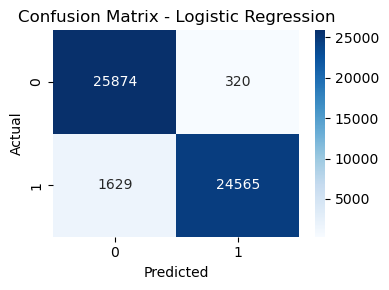


Random Forest
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000


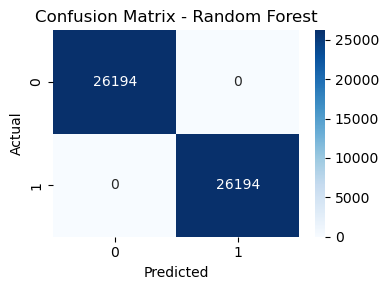


Gradient Boosting
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000


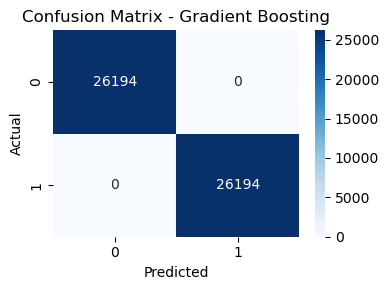


XGBoost
Accuracy:  0.9979
Precision: 0.9994
Recall:    0.9963
F1 Score:  0.9979
ROC AUC:   0.9999


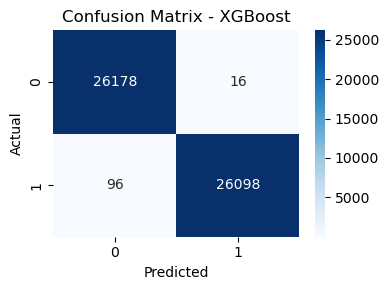


DTC
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000


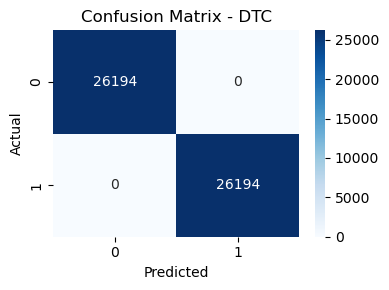

In [23]:
# === Train and evaluate ===
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # needed for ROC AUC

    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()